In [1]:
import pandas as pd
import numpy as np

%pylab inline

milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

Populating the interactive namespace from numpy and matplotlib


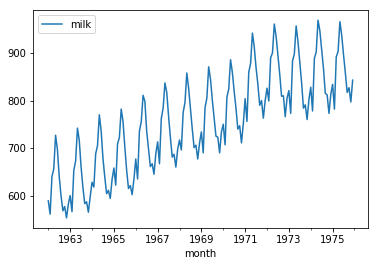

In [2]:
milk.plot.line(y="milk")

In [3]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(milk.milk)

E:\work\tools\python\anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(-1.3038115874221228,
 0.6274267086030347,
 13,
 154,
 {'1%': -3.473542528196209,
  '10%': -2.576878053634677,
  '5%': -2.880497674144038},
 1115.1730447395112)

In [5]:
milk["daily"] = milk.milk / milk.index.to_series().dt.days_in_month
milk.head()

,milk,daily
month,,
1962-01-01,589,19.000000
1962-02-01,561,20.035714
1962-03-01,640,20.645161
1962-04-01,656,21.866667
1962-05-01,727,23.451613


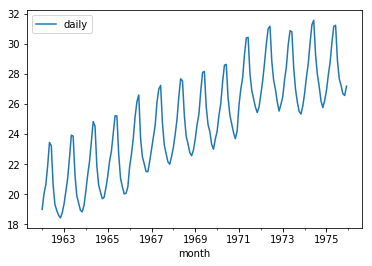

In [6]:
milk.plot.line(y="daily")

In [7]:
milk.daily.sum()

4166.326661899466

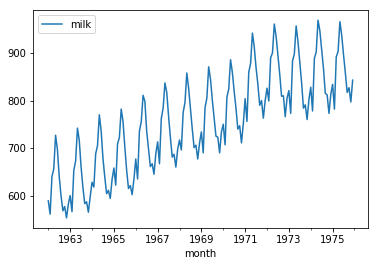

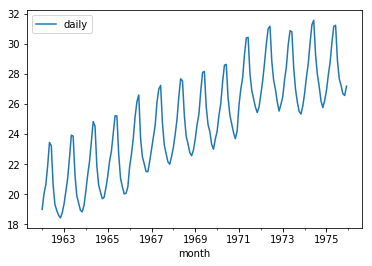

In [12]:
milk2 = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)
milk2.plot.line(y="milk")
milk2["daily"] = milk2.milk / milk.index.days_in_month
milk2.plot.line(y="daily")

(-2.159486093288808, 0.22127672658830372, 12, 143, {'1%': -3.4769274060112707, '5%': -2.8819726324025625, '10%': -2.577665408088415}, -25.225679141303317)
(-5.481326334796929, 2.2808455518037136e-06, 11, 143, {'1%': -3.4769274060112707, '5%': -2.8819726324025625, '10%': -2.577665408088415}, -20.90513750989237)


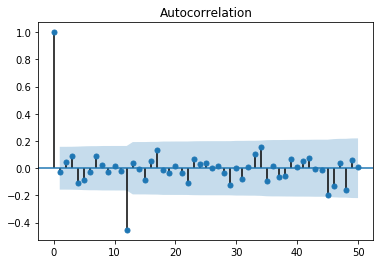

In [39]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

#print(adfuller(milk2.daily))
    
test2 = milk2.daily - milk2.daily.shift(12)
test2.dropna(inplace=True)
print(adfuller(test2))
test2 = test2 - test2.shift(1)
test2.dropna(inplace=True)
print(adfuller(test2))

a = sm.graphics.tsa.plot_acf(test2.values.squeeze(), lags=50)

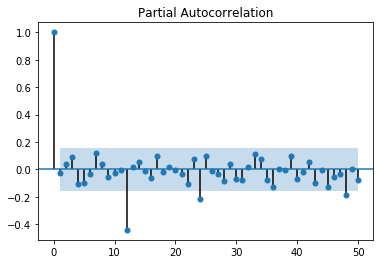

In [41]:
import statsmodels.api as sm
b = sm.graphics.tsa.plot_pacf(test2.values.squeeze(), lags=50)